In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime

import seaborn as sns
sns.set()
%matplotlib inline
# Read the data
data= pd.read_csv('./data/n1.csv')

/home/riktim/anaconda3/envs/jde/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/riktim/anaconda3/envs/jde/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data.head(10)



,username,latitude,longitude,noise_value,timestamp,tolerance_level,noise_category,region_category,aqi_value
0,Abhimanyu,22.498528,88.383528,32.6,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0
1,Abhimanyu,22.498607,88.383522,59.8,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0
2,Abhimanyu,22.498643,88.383500,60.1,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0
3,Abhimanyu,22.498713,88.383553,60.8,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0
4,Abhimanyu,22.498770,88.383603,56.3,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0
5,Abhimanyu,22.498777,88.383675,54.5,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0
6,Abhimanyu,22.498763,88.383717,51.5,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0
7,Abhimanyu,22.498783,88.383773,51.1,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0
8,Abhimanyu,22.498817,88.383827,60.3,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0
9,Abhimanyu,22.498830,88.383833,69.3,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0


In [3]:
data['population_type'] = data['noise_value'].apply(lambda x: 1 if x >=61 else 0)

data.dtypes


username                   object
latitude                  float64
longitude                 float64
noise_value               float64
timestamp          datetime64[ns]
tolerance_level            object
noise_category             object
region_category            object
aqi_value                   int64
population_type             int64
dtype: object

In [4]:
data['year']=data['timestamp'].dt.year
data['month']=data['timestamp'].dt.month
data['day']=data['timestamp'].dt.day
data['hours']=data['timestamp'].dt.hour
data['minutes']=data['timestamp'].dt.minute
data['seconds']=data['timestamp'].dt.second

data['session']=data['hours'].apply(lambda x: 1 if (x==12 or (x>=1 and x<=4))  else (0 if (x>=9 and x<=11) else 2))

data.head(10)

,username,latitude,longitude,noise_value,timestamp,tolerance_level,noise_category,region_category,aqi_value,population_type,year,month,day,hours,minutes,seconds,session
0,Abhimanyu,22.498528,88.383528,32.6,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,1,0,1
1,Abhimanyu,22.498607,88.383522,59.8,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,1,0,1
2,Abhimanyu,22.498643,88.383500,60.1,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,1,0,1
3,Abhimanyu,22.498713,88.383553,60.8,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,2,0,1
4,Abhimanyu,22.498770,88.383603,56.3,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,2,0,1
5,Abhimanyu,22.498777,88.383675,54.5,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,2,0,1
6,Abhimanyu,22.498763,88.383717,51.5,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,2,0,1
7,Abhimanyu,22.498783,88.383773,51.1,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,2,0,1
8,Abhimanyu,22.498817,88.383827,60.3,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,2,0,1
9,Abhimanyu,22.498830,88.383833,69.3,2018-01-21 02:02:00,Normal,Traffic,Street/Road,0,1,2018,1,21,2,2,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 17 columns):
username           1997 non-null object
latitude           1997 non-null float64
longitude          1997 non-null float64
noise_value        1997 non-null float64
timestamp          1997 non-null datetime64[ns]
tolerance_level    1997 non-null object
noise_category     1997 non-null object
region_category    1997 non-null object
aqi_value          1997 non-null int64
population_type    1997 non-null int64
year               1997 non-null int64
month              1997 non-null int64
day                1997 non-null int64
hours              1997 non-null int64
minutes            1997 non-null int64
seconds            1997 non-null int64
session            1997 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(4)
memory usage: 265.3+ KB


In [6]:

data.describe()

,latitude,longitude,noise_value,aqi_value,population_type,year,month,day,hours,minutes,seconds,session
count,1997.000000,1997.000000,1997.000000,1997.0,1997.000000,1997.0,1997.0,1997.000000,1997.000000,1997.000000,1997.0,1997.0
mean,22.498156,88.385192,58.200801,0.0,0.450676,2018.0,1.0,22.547321,2.001002,26.131698,0.0,1.0
std,0.004231,0.009816,8.717776,0.0,0.497686,0.0,0.0,1.823194,0.031639,15.083176,0.0,0.0
min,22.489717,88.368027,8.300000,0.0,0.000000,2018.0,1.0,21.000000,2.000000,0.000000,0.0,1.0
25%,22.493883,88.376387,54.800000,0.0,0.000000,2018.0,1.0,21.000000,2.000000,14.000000,0.0,1.0
50%,22.498317,88.384390,60.100000,0.0,0.000000,2018.0,1.0,22.000000,2.000000,26.000000,0.0,1.0
75%,22.502275,88.394295,64.200000,0.0,1.000000,2018.0,1.0,23.000000,2.000000,38.000000,0.0,1.0
max,22.504415,88.400582,75.700000,0.0,1.000000,2018.0,1.0,27.000000,3.000000,59.000000,0.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 17 columns):
username           1997 non-null object
latitude           1997 non-null float64
longitude          1997 non-null float64
noise_value        1997 non-null float64
timestamp          1997 non-null datetime64[ns]
tolerance_level    1997 non-null object
noise_category     1997 non-null object
region_category    1997 non-null object
aqi_value          1997 non-null int64
population_type    1997 non-null int64
year               1997 non-null int64
month              1997 non-null int64
day                1997 non-null int64
hours              1997 non-null int64
minutes            1997 non-null int64
seconds            1997 non-null int64
session            1997 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(4)
memory usage: 265.3+ KB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 17 columns):
username           1997 non-null object
latitude           1997 non-null float64
longitude          1997 non-null float64
noise_value        1997 non-null float64
timestamp          1997 non-null datetime64[ns]
tolerance_level    1997 non-null object
noise_category     1997 non-null object
region_category    1997 non-null object
aqi_value          1997 non-null int64
population_type    1997 non-null int64
year               1997 non-null int64
month              1997 non-null int64
day                1997 non-null int64
hours              1997 non-null int64
minutes            1997 non-null int64
seconds            1997 non-null int64
session            1997 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(4)
memory usage: 265.3+ KB


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 17 columns):
username           1997 non-null object
latitude           1997 non-null float64
longitude          1997 non-null float64
noise_value        1997 non-null float64
timestamp          1997 non-null datetime64[ns]
tolerance_level    1997 non-null object
noise_category     1997 non-null object
region_category    1997 non-null object
aqi_value          1997 non-null int64
population_type    1997 non-null int64
year               1997 non-null int64
month              1997 non-null int64
day                1997 non-null int64
hours              1997 non-null int64
minutes            1997 non-null int64
seconds            1997 non-null int64
session            1997 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(4)
memory usage: 265.3+ KB


In [10]:
data.head(2)

,username,latitude,longitude,noise_value,timestamp,tolerance_level,noise_category,region_category,aqi_value,population_type,year,month,day,hours,minutes,seconds,session
0,Abhimanyu,22.498528,88.383528,32.6,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,1,0,1
1,Abhimanyu,22.498607,88.383522,59.8,2018-01-21 02:01:00,Normal,Traffic,Street/Road,0,0,2018,1,21,2,1,0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 17 columns):
username           1997 non-null object
latitude           1997 non-null float64
longitude          1997 non-null float64
noise_value        1997 non-null float64
timestamp          1997 non-null datetime64[ns]
tolerance_level    1997 non-null object
noise_category     1997 non-null object
region_category    1997 non-null object
aqi_value          1997 non-null int64
population_type    1997 non-null int64
year               1997 non-null int64
month              1997 non-null int64
day                1997 non-null int64
hours              1997 non-null int64
minutes            1997 non-null int64
seconds            1997 non-null int64
session            1997 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(4)
memory usage: 265.3+ KB


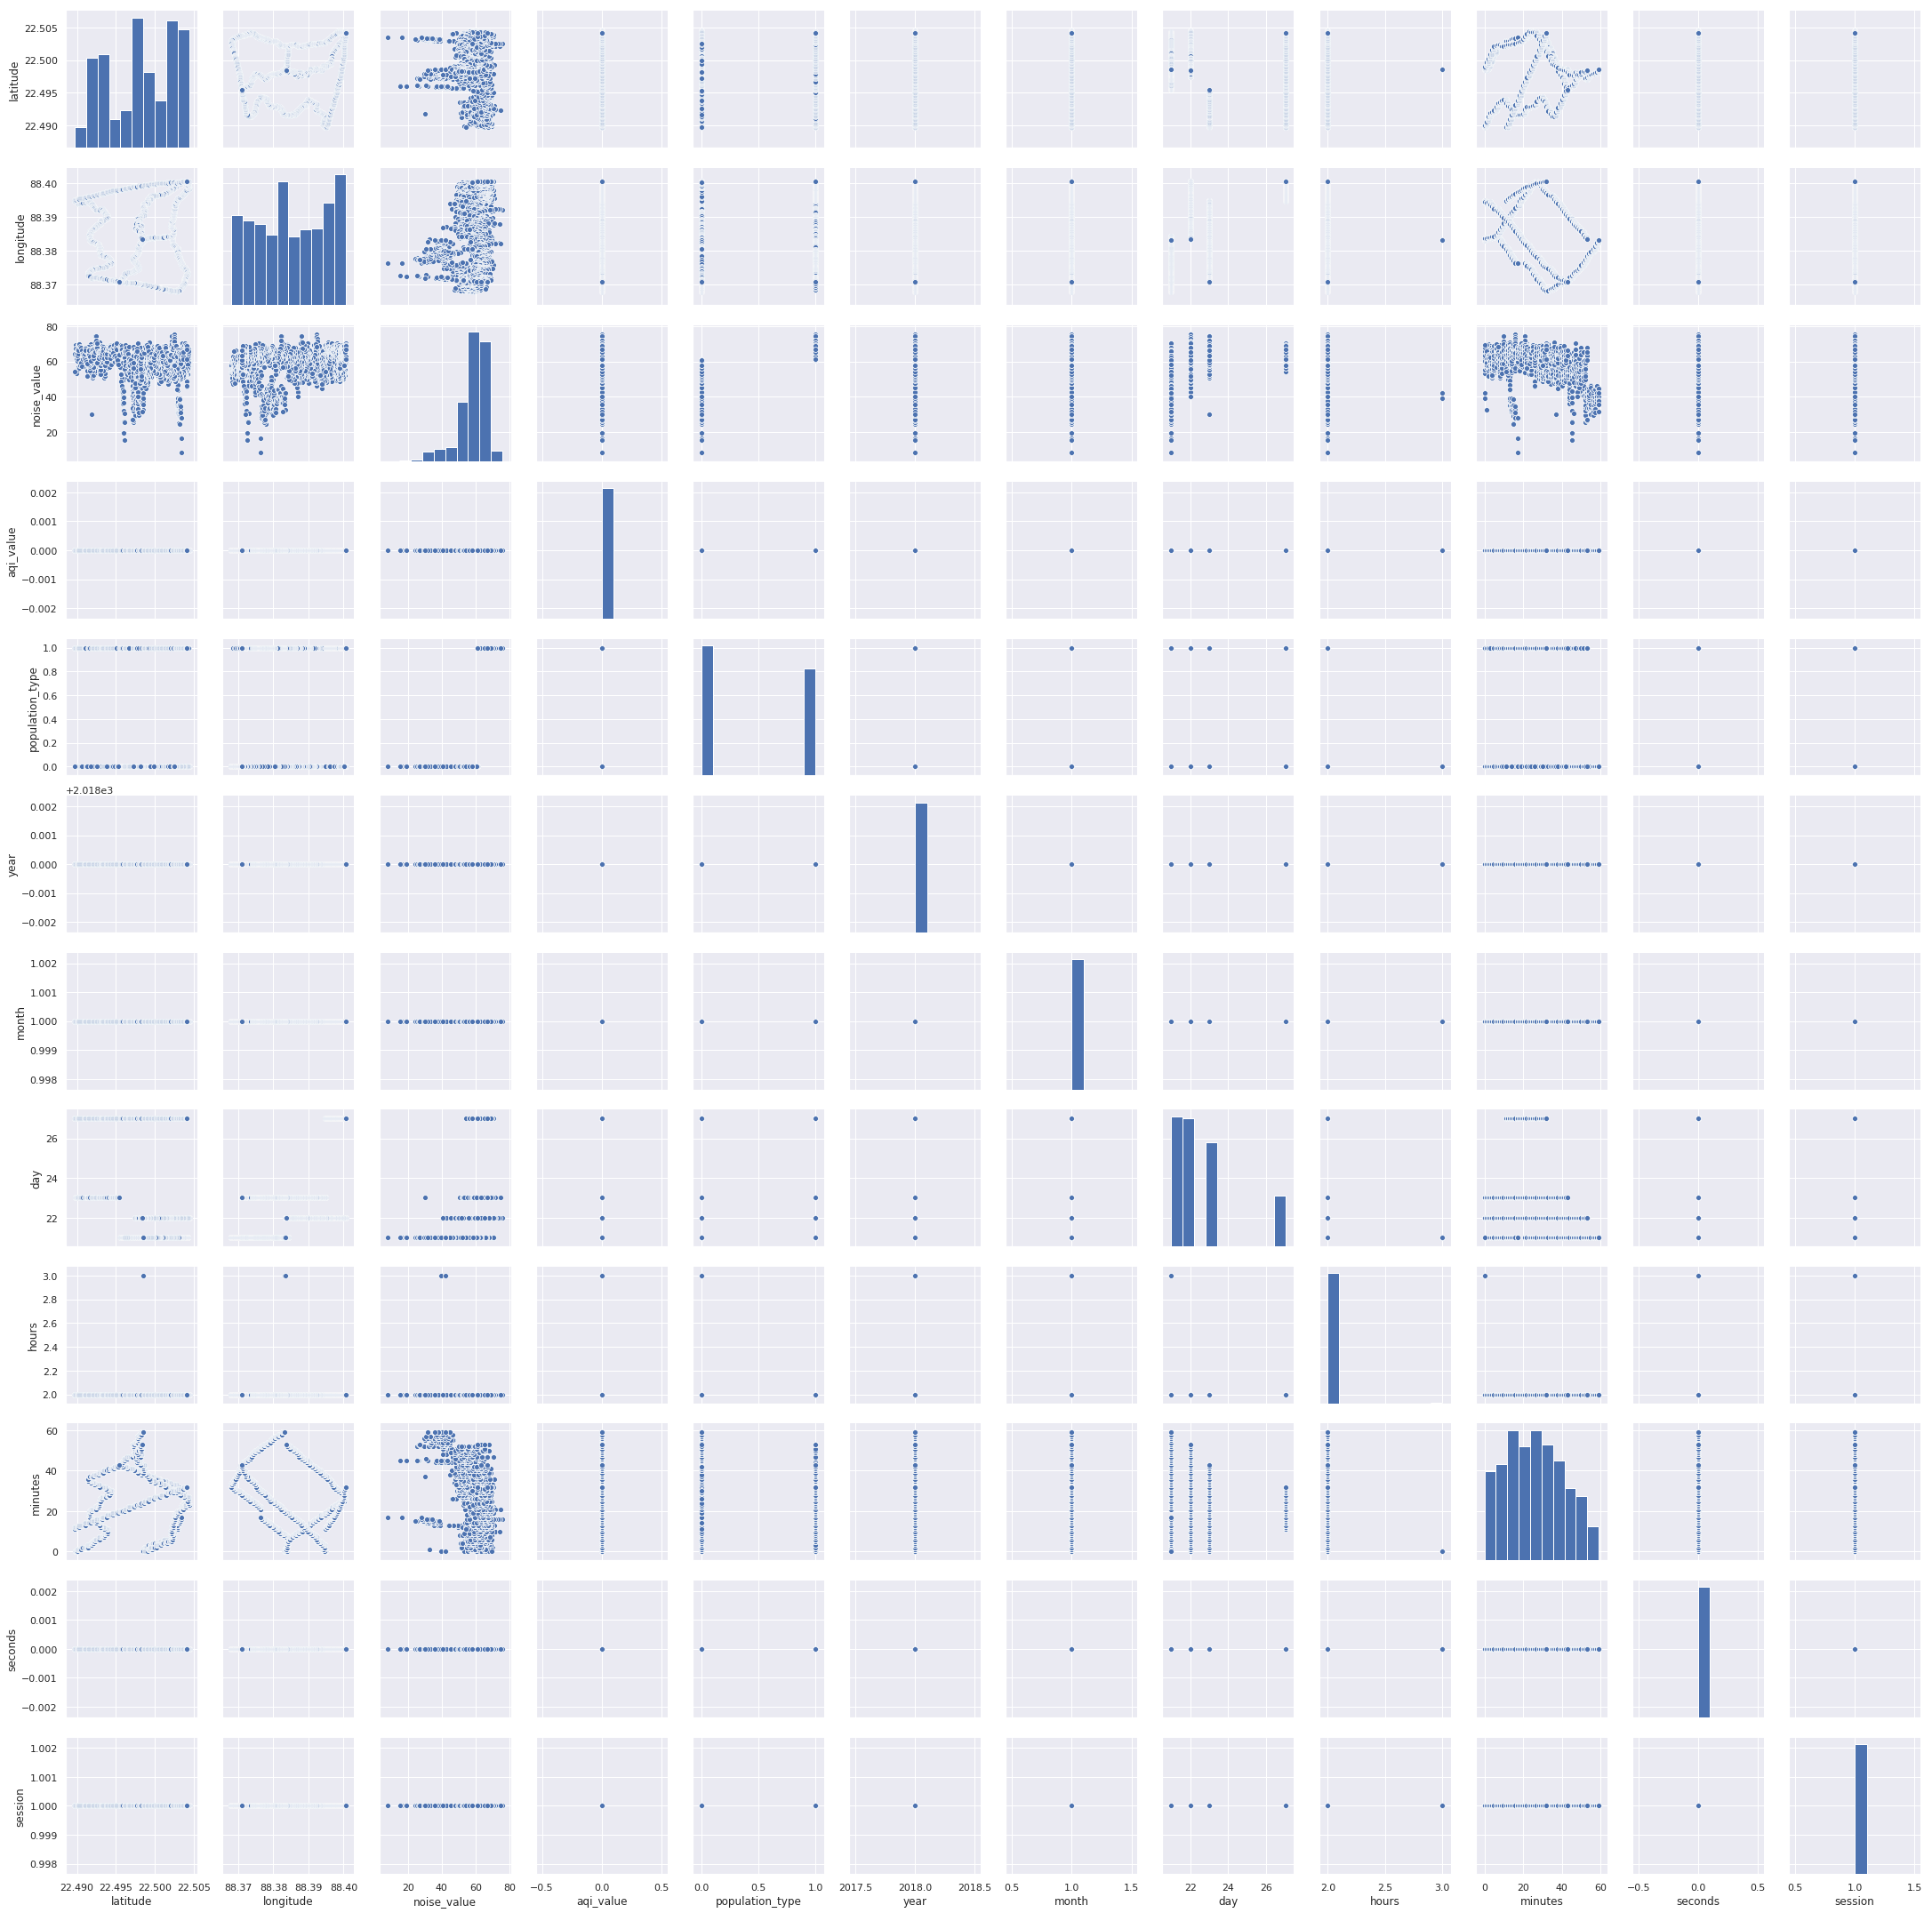

In [12]:
sns.pairplot(data)

In [13]:
train=data[0:1596]
test=data[1596:]

In [14]:
train.count()

username           1596
latitude           1596
longitude          1596
noise_value        1596
timestamp          1596
tolerance_level    1596
noise_category     1596
region_category    1596
aqi_value          1596
population_type    1596
year               1596
month              1596
day                1596
hours              1596
minutes            1596
seconds            1596
session            1596
dtype: int64

In [15]:
train_y=train.noise_value
test_y=test.noise_value

In [16]:
columns = ['username','noise_value','tolerance_level','noise_category', 'region_category', 'aqi_value','timestamp']
train.drop(columns,axis=1,inplace=True)
test.drop(columns,axis=1,inplace=True)

/home/riktim/anaconda3/envs/jde/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:

train_X=train
test_X=test
#train_X.date=train_X.date.values
#test_X.date=test_X.date.values

#train_X.time=train_X.date.values
#test_X.time=test_X.date.values



In [18]:
train.head(2)

,latitude,longitude,population_type,year,month,day,hours,minutes,seconds,session
0,22.498528,88.383528,0,2018,1,21,2,1,0,1
1,22.498607,88.383522,0,2018,1,21,2,1,0,1


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

GBR.fit(train_X, train_y)
predicted_noise = GBR.predict(test_X)

In [20]:
mse = mean_squared_error(test_y, predicted_noise)
mse

13.767675780960625

In [21]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [

     linear_model.SGDRegressor()
]



for item in classifiers:
    
    clf = item
    clf.fit(train_X, train_y)
    predicted_noise = clf.predict(test_X)
    

/home/riktim/anaconda3/envs/jde/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [22]:
mse = mean_squared_error(test_y, predicted_noise)
mse

3.5248388937661013e+30

In [23]:
my_model = RandomForestRegressor(n_estimators=1000)
my_model.fit(train_X, train_y)
predicted_noise = my_model.predict(test_X)

In [24]:
mse = mean_squared_error(test_y, predicted_noise)
mse

10.016751065433427

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(train_X)
poly_reg.fit(X_poly, train_y)

KeyboardInterrupt: 

In [ ]:
from sklearn import linear_model
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, train_y)


In [ ]:
test_x_transform=poly_reg.fit_transform(test_X)
predicted_noise = lin_reg_2.predict(test_x_transform)

In [ ]:
mse = mean_squared_error(test_y, predicted_noise)
mse